[1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1
 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1]


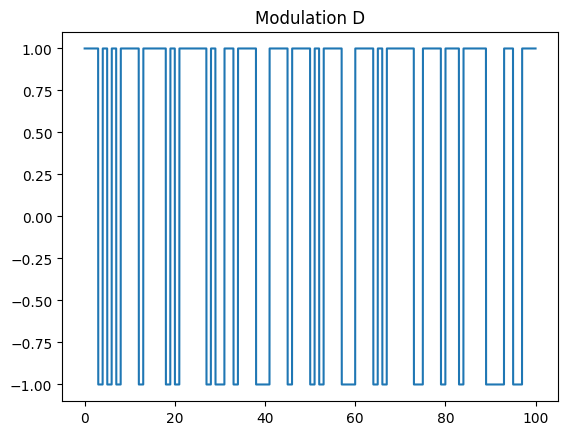

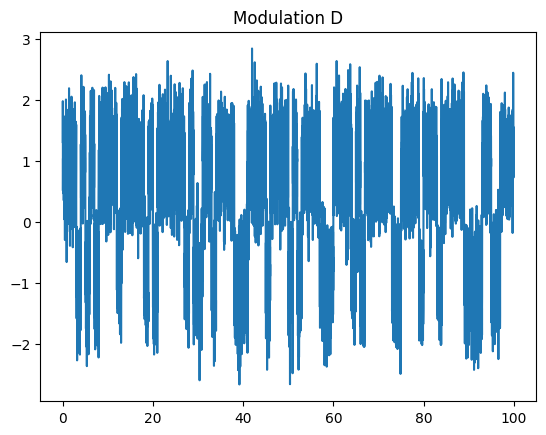

40.37037619346638
[1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1
 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1]


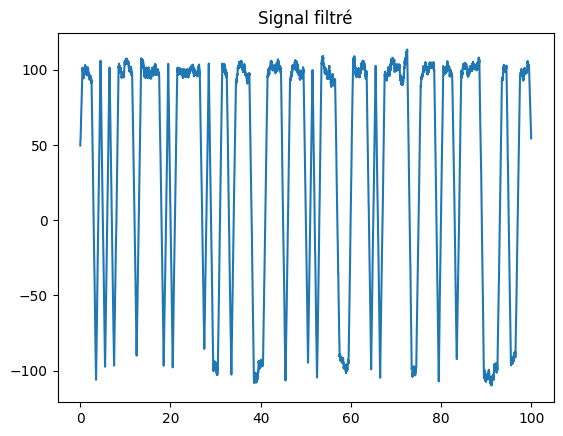

7738.655114968105
[1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1
 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1]


In [12]:
import comnumfip 
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

N=100

seq = comnumfip.randmary(N,[0.3, 0.7])
print(seq)

def showSignal(mod,point,title):
    plt.plot(mod,point)
    # Des légendes, c'est toujours bien !
    plt.title(title)
    # Affichage (pas toujours nécessaire, mais parfois c'est indispensable)
    plt.show()


modD,pointD = comnumfip.mod_d(seq,1,1)
showSignal(modD,pointD,"Modulation D")
y = comnumfip.channel(pointD,np.inf,0.5,1)
showSignal(modD,y,"Modulation D")

erreur = pointD-y

nbErreur = np.sum(np.absolute(erreur))

print((nbErreur/len(erreur))*100)

output = comnumfip.sample_and_threshold(y,0,0)
print(output)

T=1
fe=100
t= np.arange(0,T,1/fe)
motif = np.where((t<=(T)),1,0)

filtered_signal = np.convolve(y, motif,mode="same")

#canal idéal fréquence de coupure infini -> x convolué à un Dirac 



showSignal(modD,filtered_signal,"Signal filtré")

erreur1 = pointD-filtered_signal

nbErreur1= np.sum(np.absolute(erreur1))

print((nbErreur1/len(erreur1))*100)


print(comnumfip.sample_and_threshold(filtered_signal,0,0))